In [32]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import dates
import numpy as np
import pandas as pd
import scipy.stats
from scipy.interpolate import make_smoothing_spline
from sklearn.preprocessing import robust_scale
from sklearn.preprocessing import RobustScaler

In [96]:
path = '../tmp'
ticker = '8035'
date = '2024-06-05'
pkl = '%s/%s_%s.pkl' % (path, ticker, date)
df = pd.read_pickle(pkl)
df

,Price
2024-06-05 09:00:02,34270.0
2024-06-05 09:00:08,34370.0
2024-06-05 09:00:12,34290.0
2024-06-05 09:00:19,34320.0
2024-06-05 09:00:25,34330.0
...,...
2024-06-05 14:59:37,33450.0
2024-06-05 14:59:44,33450.0
2024-06-05 14:59:50,33460.0
2024-06-05 14:59:56,33470.0


In [97]:
date_str = str(df.index[0].date())
t_start_1 = pd.to_datetime(date_str + ' 09:00:00')
t_start_2 = pd.to_datetime(date_str + ' 10:00:00')
t_mid = pd.to_datetime(date_str + ' 12:00:00')
print(type(t_mid))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [98]:
df1 = df.loc[df.index[df.index < t_mid]]
df2 = df.loc[df.index[df.index > t_mid]]

In [99]:
df11 = df1.copy()
df11.index = [(t - t_start_1).total_seconds() for t in df1.index]
df11

,Price
2.0,34270.0
8.0,34370.0
12.0,34290.0
19.0,34320.0
25.0,34330.0
...,...
8976.0,33580.0
8982.0,33590.0
8990.0,33580.0
8996.0,33600.0


In [100]:
df21 = df2.copy()
df21.index = [(t - t_start_2).total_seconds() for t in df2.index]
df21

,Price
9001.0,33570.0
9007.0,33580.0
9013.0,33580.0
9019.0,33580.0
9025.0,33580.0
...,...
17977.0,33450.0
17984.0,33450.0
17990.0,33460.0
17996.0,33470.0


In [101]:
df3 = pd.concat([df11, df21])
df3

,Price
2.0,34270.0
8.0,34370.0
12.0,34290.0
19.0,34320.0
25.0,34330.0
...,...
17977.0,33450.0
17984.0,33450.0
17990.0,33460.0
17996.0,33470.0


In [102]:
dict_data = dict()
n = len(df3)
for idx in range(n):
    series = df3.iloc[idx]
    value = series.iloc[0]
    key = series.name
    dict_data[key] = value

In [103]:
df0 = pd.DataFrame({'Price': dict_data.values()}, index=dict_data.keys())
df0

,Price
2.0,34270.0
8.0,34370.0
12.0,34290.0
19.0,34320.0
25.0,34330.0
...,...
17977.0,33450.0
17984.0,33450.0
17990.0,33460.0
17996.0,33470.0


In [104]:
x = np.array(df0.index)
# y = scipy.stats.zscore(df0['Price'])
y = np.array([y for y in robust_scale(df0['Price'])])
y

array([ 4.92857143,  5.64285714,  5.07142857, ..., -0.85714286,
       -0.78571429, -0.28571429])

In [105]:
t_start_0 = 0
t_end_0 = 18000
t_interval_0 = 30

spl = make_smoothing_spline(x, y)
xs = np.linspace(t_start_0, t_end_0, int((t_end_0 - t_start_0) / t_interval_0))
type(spl(xs))

numpy.ndarray

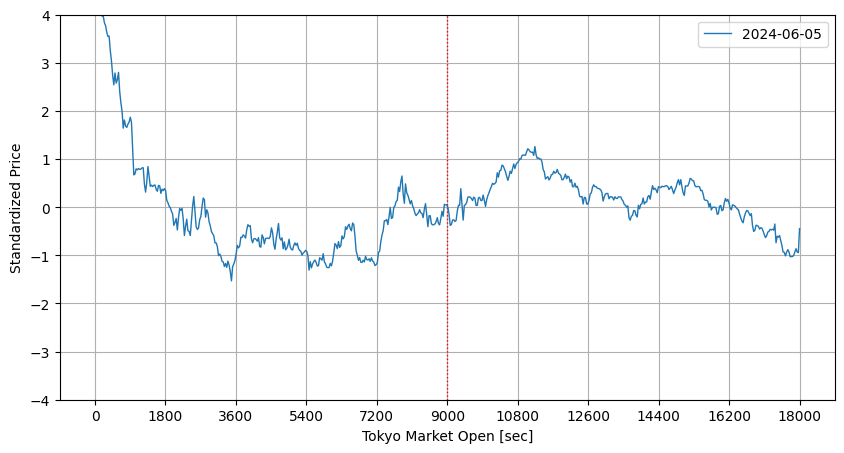

In [106]:
plt.rcParams["figure.figsize"] = (10, 5)
fig, ax = plt.subplots()

ax.axvline(x=9000, linestyle='dotted', lw=1, c='red')

ax.set_xlabel('Tokyo Market Open [sec]')
ax.set_ylabel('Standardized Price')

ax.xaxis.set_ticks(np.arange(0, 18001, 1800))
ax.set_ylim(-4, 4)

#ax.scatter(x, y, s=1, c='gray')
ax.plot(xs, spl(xs), lw=1, label=date)
ax.grid()
ax.legend(loc='best')

plt.show()

# Calculate median and IQR for scaling

In [107]:
y_raw = np.array(df0['Price'])
y_median = np.median(y_raw)
iqr = np.subtract(*np.percentile(y_raw, [75, 25]))
print(y_median, iqr)

33580.0 140.0


In [108]:
y = np.array([(v - y_median) / iqr for v in y_raw])
y

array([ 4.92857143,  5.64285714,  5.07142857, ..., -0.85714286,
       -0.78571429, -0.28571429])

In [109]:
spl = make_smoothing_spline(x, y)
xs = np.linspace(t_start_0, t_end_0, int((t_end_0 - t_start_0) / t_interval_0))
type(spl(xs))

numpy.ndarray

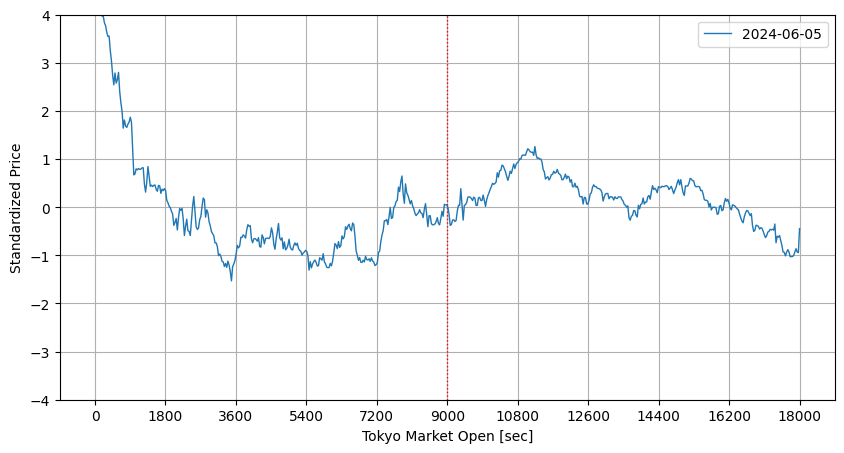

In [110]:
plt.rcParams["figure.figsize"] = (10, 5)
fig, ax = plt.subplots()

ax.axvline(x=9000, linestyle='dotted', lw=1, c='red')

ax.set_xlabel('Tokyo Market Open [sec]')
ax.set_ylabel('Standardized Price')

ax.xaxis.set_ticks(np.arange(0, 18001, 1800))
ax.set_ylim(-4, 4)

#ax.scatter(x, y, s=1, c='gray')
ax.plot(xs, spl(xs), lw=1, label=date)
ax.grid()
ax.legend(loc='best')

plt.show()